In [2]:
import pandas as pd
import numpy as np

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12,12)

In [4]:
airbnb = pd.read_csv("data/airbnb.2.clean.csv")

In [5]:
airbnb.head()

,room_id,host_id,room_type,neighborhood,overall_satisfaction,accommodates,bedrooms,price
0,6499,14455,Entire home/apt,Belém,5.0,2,1.0,57.0
1,17031,66015,Entire home/apt,Alvalade,0.0,2,1.0,46.0
2,25659,107347,Entire home/apt,Santa Maria Maior,5.0,3,1.0,69.0
3,29248,125768,Entire home/apt,Santa Maria Maior,4.5,4,1.0,58.0
4,29396,126415,Entire home/apt,Santa Maria Maior,5.0,4,1.0,67.0


In [6]:
#Categorical variable grouping
def cardinality_categorical(df):
    n_records = len(df)
    for column in df.select_dtypes([object]):
        print("{} | uniques/records: {:.3f} | Minimum observations: {:.3f}".format(
            column, 
            len(df[column].unique())/n_records,
            df[column].value_counts().min()
        ))        

cardinality_categorical(airbnb)

room_type | uniques/records: 0.000 | Minimum observations: 171.000
neighborhood | uniques/records: 0.002 | Minimum observations: 23.000


In [7]:
airbnb.neighborhood.unique()

array(['Belém', 'Alvalade', 'Santa Maria Maior', 'Estrela', 'Alcântara',
       'Misericórdia', 'Avenidas Novas', 'Lumiar', 'São Vicente',
       'Campo de Ourique', 'Santo António', 'São Domingos de Benfica',
       'Parque das Nações', 'Penha de França', 'Arroios', 'Beato',
       'Campolide', 'Benfica', 'Areeiro', 'Ajuda', 'Carnide', 'Olivais',
       'Santa Clara', 'Marvila'], dtype=object)

In [8]:
#categorize areas based off of percentage of entries in particular neighborhoods
airbnb["area_popularity"] = "Not_popular_area"

airbnb["area_popularity"][airbnb.neighborhood.isin([
    "Santa Maria Maior", "Misericórdia",
    "Arroios", "Santo António", "São Vicente"
])] = "Very_popular_area"

airbnb["area_popularity"][airbnb.neighborhood.isin([
    "Estrela", "Avenidas Novas", "Penha de França",
    "Campo de Ourique","Areeiro", "Belém",
    "Alvalade"
])] = "Decently_popular_area"

airbnb["area_popularity"][airbnb.neighborhood.isin([
    "Parque das Nações", "Alcântara", "São Domingos de Benfica",
    "Lumiar", "Campolide", "Olivais",
])] = "Less_popular_area"

/Users/Chris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/Chris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/Chris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Continuous variable grouping

In [9]:
price_types = ["low", "medium", "high", "very high"]

airbnb['price_type'] = pd.qcut(airbnb['price'],
                                  4, price_types)

In [10]:
accommodation_types = ["low", "medium", "high"]

airbnb['accommodation_type'] = pd.qcut(airbnb['accommodates'],
                                  3, accommodation_types)

In [11]:
overall_satisfaction_types = ["Poor/No_reviews", "Fair", "Great"]

airbnb["overall_satisfaction_type"] = pd.qcut(airbnb['overall_satisfaction'],
                                  3, overall_satisfaction_types)

In [12]:
airbnb.head()

,room_id,host_id,room_type,neighborhood,overall_satisfaction,accommodates,bedrooms,price,area_popularity,price_type,accommodation_type,overall_satisfaction_type
0,6499,14455,Entire home/apt,Belém,5.0,2,1.0,57.0,Decently_popular_area,medium,low,Great
1,17031,66015,Entire home/apt,Alvalade,0.0,2,1.0,46.0,Decently_popular_area,medium,low,Poor/No_reviews
2,25659,107347,Entire home/apt,Santa Maria Maior,5.0,3,1.0,69.0,Very_popular_area,high,medium,Great
3,29248,125768,Entire home/apt,Santa Maria Maior,4.5,4,1.0,58.0,Very_popular_area,medium,medium,Fair
4,29396,126415,Entire home/apt,Santa Maria Maior,5.0,4,1.0,67.0,Very_popular_area,high,medium,Great


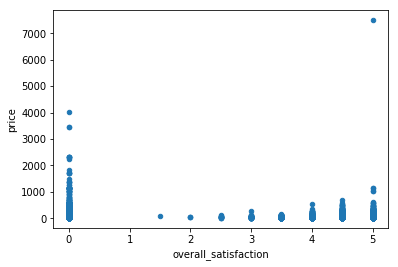

In [13]:
airbnb.plot.scatter(x="overall_satisfaction",y="price")

-Expensive rooms are met with higher reviews or have no reviews due to lack of customers paying for it. There seems to be a positive trend for reviews of higher priced rooms. The more expensive means better quality, as expected.

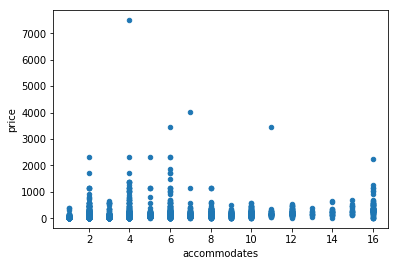

In [14]:
airbnb.plot.scatter(x="accommodates",y="price")

-Entries with higher accomodations seem to hold the same price as rooms with lower accommodations, thus showing that a huge factor in price setting by the host is likely quality and area.

In [15]:
airbnb.to_pickle("data/airbnb.3.grouped.pkl")